# By Saeed Dehghani

## Furniture Sales Forecast

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
pip install --pre pycaret

- The Global Superstore dataset is data from a fictional global retail chain that sells office supplies.


- The Dataset includes data for the Sales of multiple products sold by a company along with subsequent information related to  geography, Product categories, and subcategories, sales, and profits, etc.


- we want forecast furniture categories with machine learning methods

In [91]:
df = pd.read_excel("super store.xlsx")

## Part1: EDA and prepare data

In [92]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,Consumer,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,4,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,5,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,Consumer,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [93]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,Consumer,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
9990,9991,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,Consumer,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
9991,9992,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,Corporate,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
9992,9993,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,Corporate,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
9993,9994,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,Consumer,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Ship Date     9994 non-null   datetime64[ns]
 4   Ship Mode     9994 non-null   object        
 5   Segment       9994 non-null   object        
 6   Product ID    9994 non-null   object        
 7   Category      9994 non-null   object        
 8   Sub-Category  9994 non-null   object        
 9   Product Name  9994 non-null   object        
 10  Sales         9994 non-null   float64       
 11  Quantity      9994 non-null   int64         
 12  Discount      9994 non-null   float64       
 13  Profit        9994 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [95]:
#Date
df["Order Date"] = pd.to_datetime(df["Order Date"])

#Extract Year
df["Year"] = pd.DatetimeIndex(df["Order Date"]).year

#Extract Month
df["Month"] = pd.DatetimeIndex(df["Order Date"]).month

In [96]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,1,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,Consumer,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2014,1
1,2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2014,1
2,3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2014,1
3,4,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2014,1
4,5,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,Consumer,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2014,1


In [97]:
#TS for Monthly Sales
ts1 = df.groupby(["Category","Year","Month"],as_index=False)["Sales"].sum()

In [98]:
ts1

,Category,Year,Month,Sales
0,Furniture,2014,1,6242.525
1,Furniture,2014,2,1839.658
2,Furniture,2014,3,14573.956
3,Furniture,2014,4,7944.837
4,Furniture,2014,5,6912.787
...,...,...,...,...
139,Technology,2017,8,17619.162
140,Technology,2017,9,26942.603
141,Technology,2017,10,32855.663
142,Technology,2017,11,49918.773


In [99]:
d = pd.Series(np.arange(2014,2018),name="Year").repeat(12).reset_index(drop=True)
s = pd.Series(list(np.arange(1,13))*4,name="Month")
monthly_sales = pd.concat([d,s],axis=1)

In [100]:
monthly_sales.head()

,Year,Month
0,2014,1
1,2014,2
2,2014,3
3,2014,4
4,2014,5


In [101]:
monthly_sales.tail()

,Year,Month
43,2017,8
44,2017,9
45,2017,10
46,2017,11
47,2017,12


In [102]:
#Furniture Sales
monthly_sales["furniture"] = ts1[ts1["Category"]=="Furniture"]["Sales"]

#Office Sales
monthly_sales["officesupply"] = ts1[ts1["Category"]=="Office Supplies"]["Sales"].reset_index(drop=True)

#Technology Sales
monthly_sales["technology"] = ts1[ts1["Category"]=="Technology"]["Sales"].reset_index(drop=True)

In [103]:
monthly_sales.head()

,Year,Month,furniture,officesupply,technology
0,2014,1,6242.525,4851.080,3143.290
1,2014,2,1839.658,1071.724,1608.510
2,2014,3,14573.956,8605.879,32511.174
3,2014,4,7944.837,11155.074,9195.434
4,2014,5,6912.787,7135.624,9599.876


In [104]:
monthly_sales["total"] = monthly_sales.iloc[:,2:5].apply(sum,axis=1)

In [105]:
monthly_sales.head()

,Year,Month,furniture,officesupply,technology,total
0,2014,1,6242.525,4851.080,3143.290,14236.895
1,2014,2,1839.658,1071.724,1608.510,4519.892
2,2014,3,14573.956,8605.879,32511.174,55691.009
3,2014,4,7944.837,11155.074,9195.434,28295.345
4,2014,5,6912.787,7135.624,9599.876,23648.287


In [106]:
monthly_sales.tail()

,Year,Month,furniture,officesupply,technology,total
43,2017,8,15441.8740,30059.852,17619.162,63120.8880
44,2017,9,29028.2060,31895.843,26942.603,87866.6520
45,2017,10,21884.0682,23037.192,32855.663,77776.9232
46,2017,11,37056.7150,31472.337,49918.773,118447.8250
47,2017,12,31407.4668,30436.942,21984.910,83829.3188


In [107]:
#Create time index and convert data to time series
date = pd.date_range(start="2014-1",end="2017-12",freq="MS")

In [108]:
monthly_sales.set_index(date,inplace=True)

In [109]:
monthly_sales.drop(["Year","Month"],axis=1,inplace=True)

In [110]:
monthly_sales.head()

,furniture,officesupply,technology,total
2014-01-01,6242.525,4851.080,3143.290,14236.895
2014-02-01,1839.658,1071.724,1608.510,4519.892
2014-03-01,14573.956,8605.879,32511.174,55691.009
2014-04-01,7944.837,11155.074,9195.434,28295.345
2014-05-01,6912.787,7135.624,9599.876,23648.287


In [111]:
monthly_sales.tail()

,furniture,officesupply,technology,total
2017-08-01,15441.8740,30059.852,17619.162,63120.8880
2017-09-01,29028.2060,31895.843,26942.603,87866.6520
2017-10-01,21884.0682,23037.192,32855.663,77776.9232
2017-11-01,37056.7150,31472.337,49918.773,118447.8250
2017-12-01,31407.4668,30436.942,21984.910,83829.3188


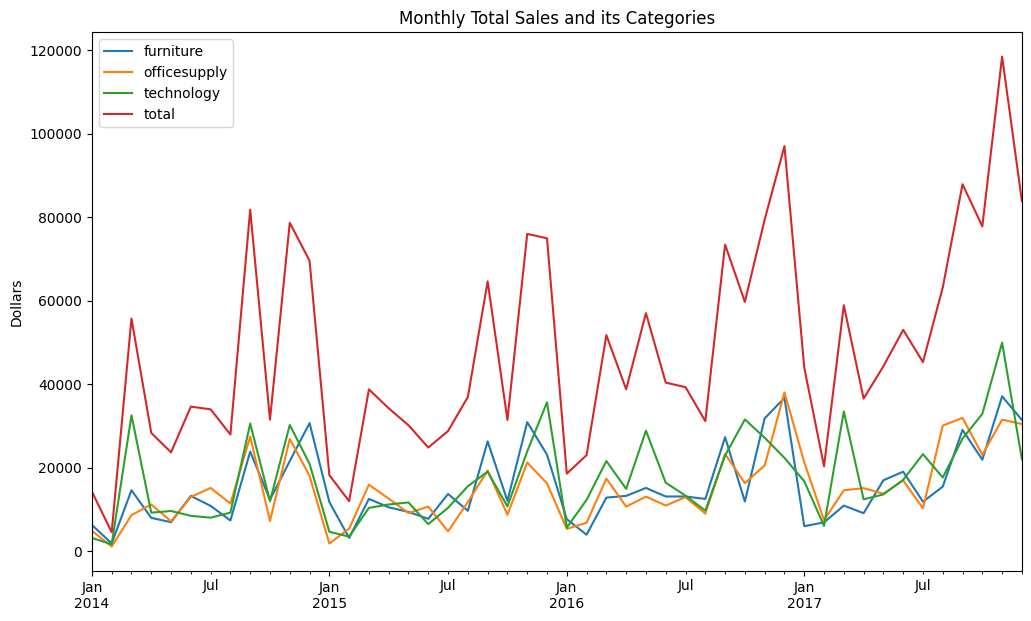

In [112]:
#Total Sales and its Categories
ax = monthly_sales.plot(figsize=(12,7))
ax.set_ylabel("Dollars")
ax.set_title("Monthly Total Sales and its Categories")
plt.show()

### Focusing on forecast furniture

In [113]:
Furniture_Sales = pd.DataFrame(monthly_sales.iloc[:,0],index=monthly_sales.index)

In [114]:
Furniture_Sales.head()

,furniture
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


In [115]:
Furniture_Sales.tail()

,furniture
2017-08-01,15441.8740
2017-09-01,29028.2060
2017-10-01,21884.0682
2017-11-01,37056.7150
2017-12-01,31407.4668


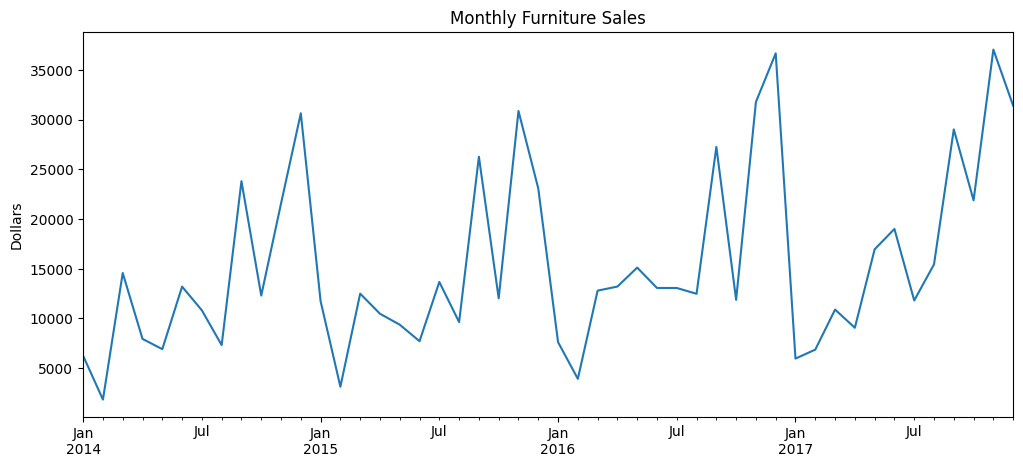

In [116]:
# plot Furniture Sales
ax=Furniture_Sales["furniture"].plot(figsize=(12,5))
ax.set_ylabel("Dollars")
ax.set_title("Monthly Furniture Sales")
plt.show()

In [117]:
Furniture_Sales.describe()

,furniture
count,48.000000
mean,15458.329069
std,9103.800668
min,1839.658000
25%,9297.702400
50%,12650.437500
75%,21644.671575
max,37056.715000


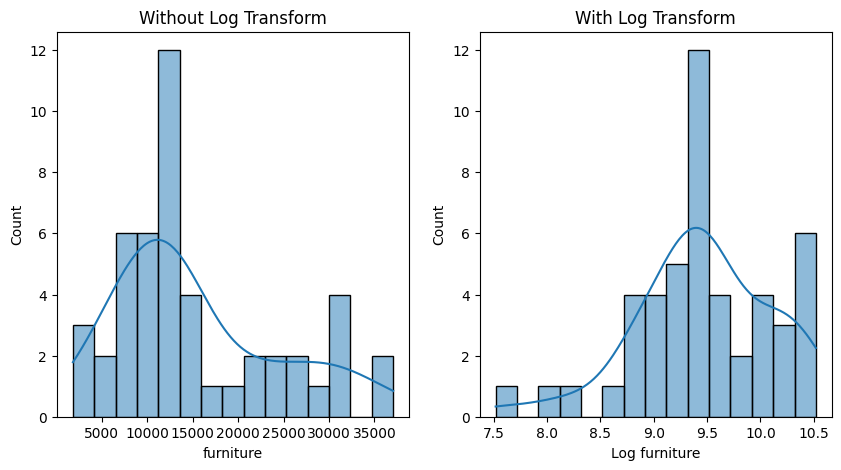

In [118]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.histplot(Furniture_Sales["furniture"], kde=True,bins=15)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.histplot(np.log(Furniture_Sales["furniture"]),kde=True,bins=15)
plt.xlabel("Log furniture")
plt.title("With Log Transform")

plt.show()

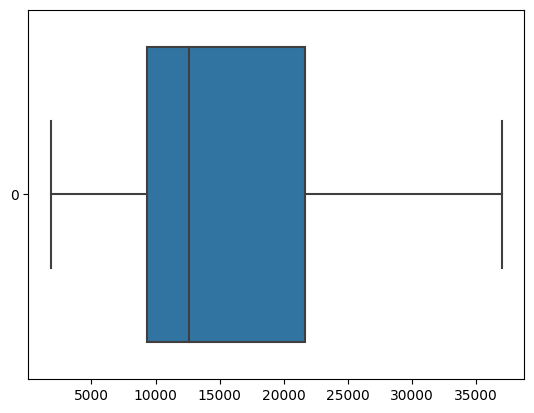

In [119]:
sns.boxplot(Furniture_Sales["furniture"],orient="h")
plt.show()

- It Highly Skewed
- No Outlier

### Is mean and variance constant?

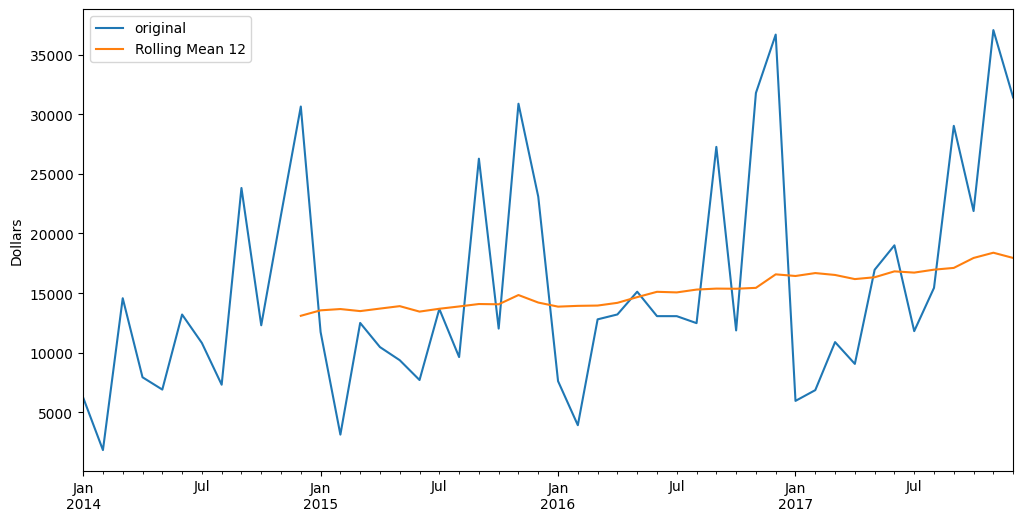

In [120]:
plt.figure(figsize = (10,7))
Furniture_Sales["furniture"].plot(figsize=(12,6), legend=True, label="original")
Furniture_Sales["furniture"].rolling(12, center=False).mean().plot(legend=True, label="Rolling Mean 12")
plt.ylabel("Dollars")
plt.show()

- it seems mean is constant.

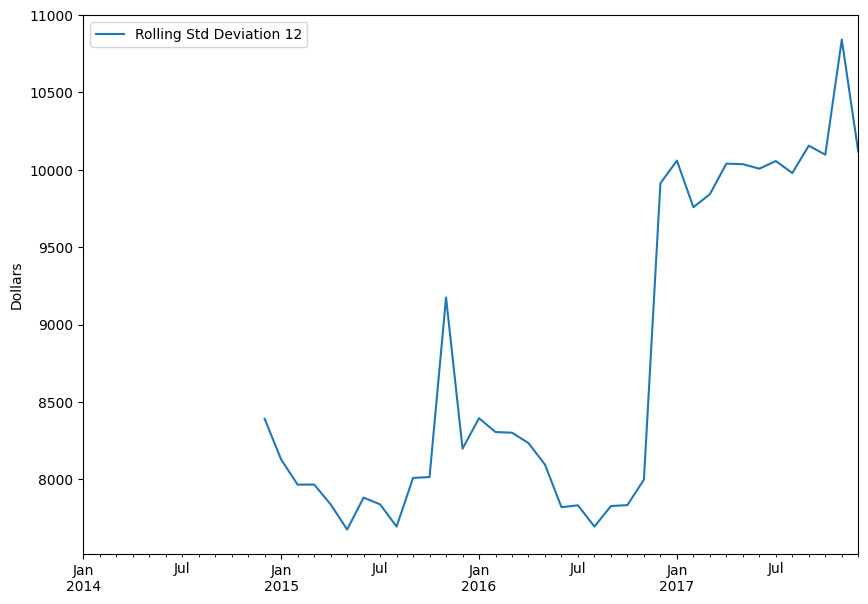

In [121]:
plt.figure(figsize = (10,7))
Furniture_Sales["furniture"].rolling(12).std().plot(legend=True, label="Rolling Std Deviation 12")
plt.ylabel("Dollars")
plt.show()

- variance is increasing.

### Adding holidays and season

In [122]:
Furniture_Sales.reset_index(inplace=True)

In [123]:
Furniture_Sales["year"] = Furniture_Sales["index"].dt.year
Furniture_Sales["month"] = Furniture_Sales["index"].dt.month
Furniture_Sales["season"] = Furniture_Sales["index"].dt.month

In [124]:
Furniture_Sales["season"] = Furniture_Sales["season"].replace({1:"Spring",2:"Spring",3:"Spring",
                                                               4:"Summer",5:"Summer",6:"Summer",
                                                               7:"Autumn",8:"Autumn",9:"Autumn",
                                                              10:"Winter",11:"Winter",12:"Winter"})

In [125]:
Furniture_Sales.head()

,index,furniture,year,month,season
0,2014-01-01,6242.525,2014,1,Spring
1,2014-02-01,1839.658,2014,2,Spring
2,2014-03-01,14573.956,2014,3,Spring
3,2014-04-01,7944.837,2014,4,Summer
4,2014-05-01,6912.787,2014,5,Summer


In [126]:
#Adding holidays column to indicate whether a day was a holiday as per the US calendar or not
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start = Furniture_Sales["index"].min() , end = Furniture_Sales["index"].max())
Furniture_Sales["holiday"] = Furniture_Sales["index"].isin(holidays)

In [127]:
#converting the holiday column to 1 and 0, 1 indicating a holiday and 0 not a holiday
mapped = {True:1, False:0}
Furniture_Sales["holiday"] = Furniture_Sales["holiday"].map(mapped)
Furniture_Sales.head()

,index,furniture,year,month,season,holiday
0,2014-01-01,6242.525,2014,1,Spring,1
1,2014-02-01,1839.658,2014,2,Spring,0
2,2014-03-01,14573.956,2014,3,Spring,0
3,2014-04-01,7944.837,2014,4,Summer,0
4,2014-05-01,6912.787,2014,5,Summer,0


In [128]:
Furniture_Sales["holiday"].value_counts(normalize=True).round(3)

0    0.917
1    0.083
Name: holiday, dtype: float64

In [129]:
weekdays = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3: "Thursday", 4: "Friday", 5:"Saturday", 6:"Sunday"}

Furniture_Sales["weekday"] = Furniture_Sales["index"].dt.weekday.map(weekdays)

In [130]:
Furniture_Sales.head()

,index,furniture,year,month,season,holiday,weekday
0,2014-01-01,6242.525,2014,1,Spring,1,Wednesday
1,2014-02-01,1839.658,2014,2,Spring,0,Saturday
2,2014-03-01,14573.956,2014,3,Spring,0,Saturday
3,2014-04-01,7944.837,2014,4,Summer,0,Tuesday
4,2014-05-01,6912.787,2014,5,Summer,0,Thursday


In [131]:
Furniture_Sales["weekday"].value_counts(normalize=True).round(3)

Wednesday    0.167
Saturday     0.146
Tuesday      0.146
Sunday       0.146
Friday       0.146
Thursday     0.125
Monday       0.125
Name: weekday, dtype: float64

In [132]:
#adding in another column which indicates 'non-working' days which include weekends and holidays
Furniture_Sales["non_working"] = Furniture_Sales.apply(lambda x: "non-working" if \
                                         ((x["holiday"] == 1) or (x["weekday"] in ["Saturday", "Sunday"]))
                                         else "working", axis = 1)

In [133]:
Furniture_Sales.head()

,index,furniture,year,month,season,holiday,weekday,non_working
0,2014-01-01,6242.525,2014,1,Spring,1,Wednesday,non-working
1,2014-02-01,1839.658,2014,2,Spring,0,Saturday,non-working
2,2014-03-01,14573.956,2014,3,Spring,0,Saturday,non-working
3,2014-04-01,7944.837,2014,4,Summer,0,Tuesday,working
4,2014-05-01,6912.787,2014,5,Summer,0,Thursday,working


In [134]:
Furniture_Sales["non_working"].value_counts(normalize=True).round(2)

working        0.62
non-working    0.38
Name: non_working, dtype: float64

### Average monthly furniture sell over the entire period 2014-17

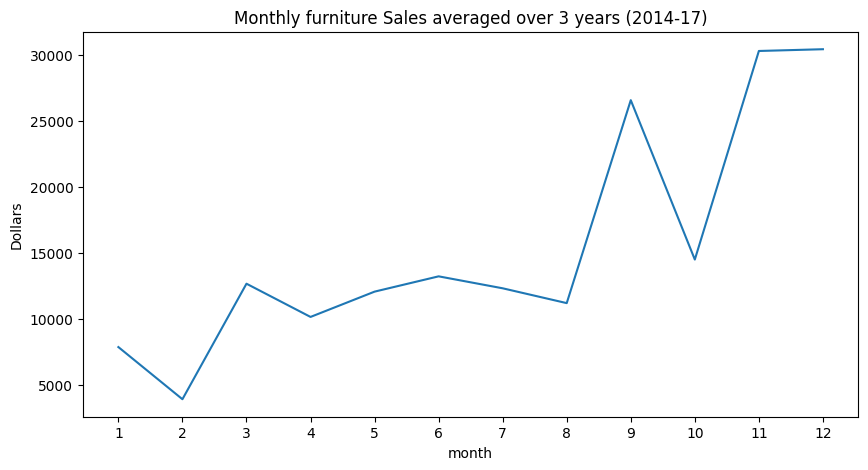

In [135]:
Furniture_Sales.groupby("month")["furniture"].mean().plot(figsize = (10,5))
plt.ylabel("Dollars")
plt.xticks(Furniture_Sales["month"].unique())
plt.title("Monthly furniture Sales averaged over 3 years (2014-17)")
plt.show()

- may be there is a overall increasing trend.

### Distribution of furniture sells by season

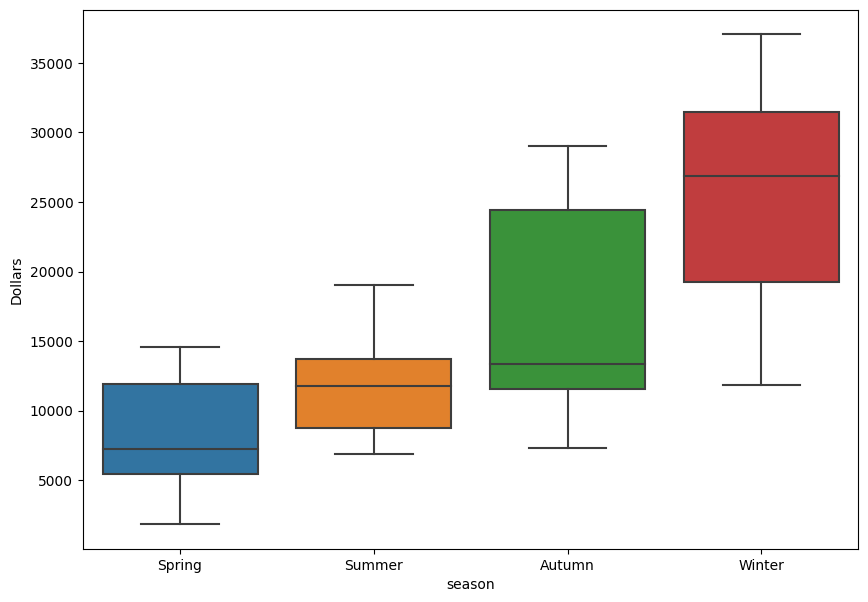

In [136]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "season", y = "furniture", data = Furniture_Sales)
plt.ylabel("Dollars")
plt.show()

### Distribution of furniture sells by working and not working days

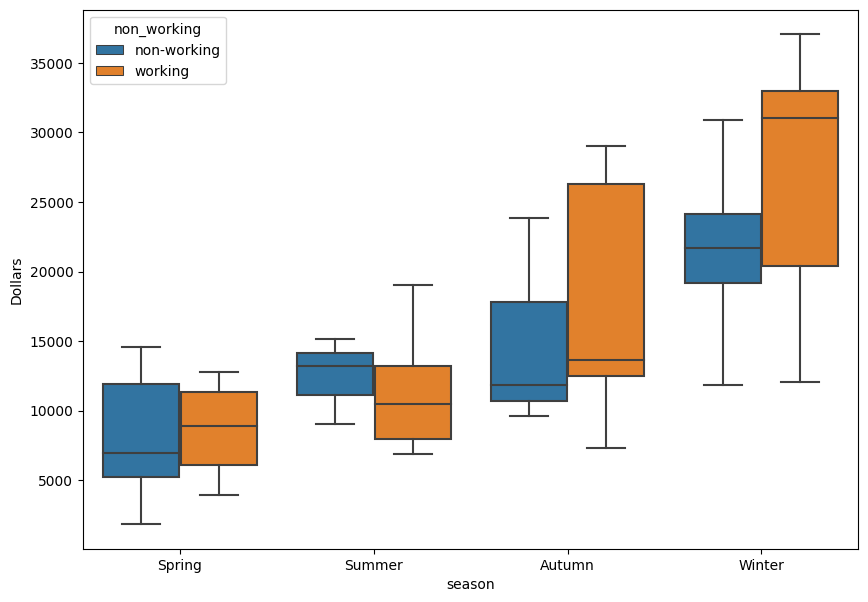

In [137]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "season", y = "furniture", data = Furniture_Sales,hue="non_working")
plt.ylabel("Dollars")
plt.show()

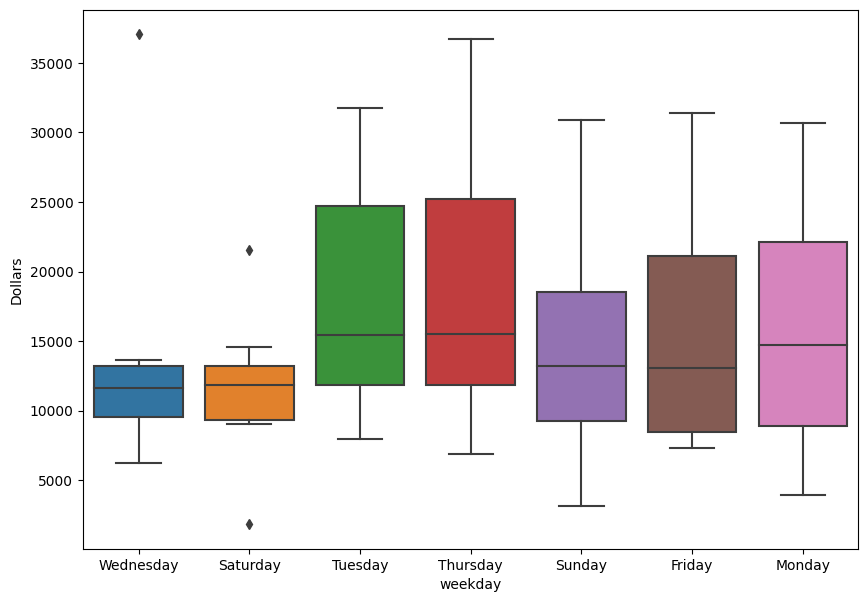

In [138]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "weekday", y = "furniture", data = Furniture_Sales)
plt.ylabel("Dollars")
plt.show()

In [139]:
# use Year for trend and Month for seasonality
Furniture_Sales["series"] = np.arange(1,len(Furniture_Sales)+1)
Furniture_Sales["non_working"] = Furniture_Sales["non_working"].replace({"non-working":0,"working":1})

In [140]:
Furniture_Sales.head()

,index,furniture,year,month,season,holiday,weekday,non_working,series
0,2014-01-01,6242.525,2014,1,Spring,1,Wednesday,0,1
1,2014-02-01,1839.658,2014,2,Spring,0,Saturday,0,2
2,2014-03-01,14573.956,2014,3,Spring,0,Saturday,0,3
3,2014-04-01,7944.837,2014,4,Summer,0,Tuesday,1,4
4,2014-05-01,6912.787,2014,5,Summer,0,Thursday,1,5


In [141]:
Furniture_Sales.tail()

,index,furniture,year,month,season,holiday,weekday,non_working,series
43,2017-08-01,15441.8740,2017,8,Autumn,0,Tuesday,1,44
44,2017-09-01,29028.2060,2017,9,Autumn,0,Friday,1,45
45,2017-10-01,21884.0682,2017,10,Winter,0,Sunday,0,46
46,2017-11-01,37056.7150,2017,11,Winter,0,Wednesday,1,47
47,2017-12-01,31407.4668,2017,12,Winter,0,Friday,1,48


In [142]:
Furniture_Sales = Furniture_Sales.loc[:,["furniture","series","year","month","season"]]

In [143]:
Furniture_Sales.head()

,furniture,series,year,month,season
0,6242.525,1,2014,1,Spring
1,1839.658,2,2014,2,Spring
2,14573.956,3,2014,3,Spring
3,7944.837,4,2014,4,Summer
4,6912.787,5,2014,5,Summer


In [144]:
# we used 36 months for train and 12 months for test
train = Furniture_Sales.iloc[0:36]
test = Furniture_Sales.iloc[36:]

In [145]:
train.head()

,furniture,series,year,month,season
0,6242.525,1,2014,1,Spring
1,1839.658,2,2014,2,Spring
2,14573.956,3,2014,3,Spring
3,7944.837,4,2014,4,Summer
4,6912.787,5,2014,5,Summer


In [146]:
train.tail()

,furniture,series,year,month,season
31,12483.2323,32,2016,8,Autumn
32,27262.8809,33,2016,9,Autumn
33,11872.5770,34,2016,10,Winter
34,31783.6288,35,2016,11,Winter
35,36678.7150,36,2016,12,Winter


In [147]:
test.head()

,furniture,series,year,month,season
36,5964.0320,37,2017,1,Spring
37,6866.3374,38,2017,2,Spring
38,10893.4448,39,2017,3,Spring
39,9065.9581,40,2017,4,Summer
40,16957.5582,41,2017,5,Summer


In [148]:
test.tail()

,furniture,series,year,month,season
43,15441.8740,44,2017,8,Autumn
44,29028.2060,45,2017,9,Autumn
45,21884.0682,46,2017,10,Winter
46,37056.7150,47,2017,11,Winter
47,31407.4668,48,2017,12,Winter


In [149]:
train.shape, test.shape

((36, 5), (12, 5))

## Part2: Build Models and Evaluate

In [150]:
from pycaret.regression import *

s = setup(data = train,test_data=test, target = "furniture",
          fold_strategy = "timeseries",numeric_features = ["series","year","month"],
          categorical_features=["season"], fold = 3,session_id = 123,transform_target=True)

,Description,Value
0,Session id,123
1,Target,furniture
2,Target type,Regression
3,Original data shape,"(48, 5)"
4,Transformed data shape,"(48, 8)"
5,Transformed train set shape,"(36, 8)"
6,Transformed test set shape,"(12, 8)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True


In [152]:
best = compare_models(sort="MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3963.5277,26465250.7482,5122.0976,0.6243,0.3431,0.3121,0.2200
gbr,Gradient Boosting Regressor,4289.8158,29735049.1827,5440.5298,0.5837,0.3482,0.2918,0.1967
ada,AdaBoost Regressor,4480.6329,31632110.2794,5566.3961,0.5410,0.3810,0.3885,0.1767
rf,Random Forest Regressor,4743.1691,33704451.1796,5798.0922,0.5249,0.3719,0.3471,0.1867
br,Bayesian Ridge,5371.2406,43317729.9173,6557.6073,0.3780,0.4536,0.4692,0.1400
en,Elastic Net,5622.6452,46715483.6537,6764.3528,0.3171,0.4712,0.5187,0.1267
knn,K Neighbors Regressor,6134.4115,82166074.6667,9000.4767,-0.1245,0.5396,0.3953,0.1467
dt,Decision Tree Regressor,6275.9984,67123230.1334,7982.9586,-0.0141,0.4816,0.5019,0.1067
ridge,Ridge Regression,6617.5195,66504537.1349,7737.5433,-0.0259,0.5353,0.6728,0.2767
dummy,Dummy Regressor,7007.7274,107329224.0000,10261.8750,-0.4602,0.6305,0.4220,0.2167


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [164]:
model =create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4728.2015,34145443.6180,5843.4103,0.4215,0.4942,0.5148
1,4143.3716,29346113.9101,5417.2054,0.6018,0.3089,0.2546
2,5357.9343,37621796.0107,6133.6609,0.5515,0.3127,0.2718
Mean,4743.1691,33704451.1796,5798.0922,0.5249,0.3719,0.3471
Std,495.9561,3392892.9942,294.2419,0.0760,0.0865,0.1188


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [165]:
tuned = tune_model(model,optimize= "MAE",n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4818.2851,54187614.1239,7361.2237,0.0819,0.5009,0.3715
1,5031.8259,42106820.0457,6488.9768,0.4286,0.3803,0.3245
2,6655.3015,62992702.9681,7936.7943,0.2491,0.3937,0.3225
Mean,5501.8042,53095712.3792,7262.3316,0.2532,0.4250,0.3395
Std,820.2914,8561511.2929,595.1910,0.1416,0.0540,0.0226


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [166]:
prediction_holdout = predict_model(tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,3270.2984,14018802.6719,3744.1692,0.8506,0.2407,0.2145


In [167]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Part3: Forecast

In [168]:
final_best = finalize_model(tuned) # train model on whole data
future_df = pd.DataFrame({"series":[49,50,51] ,"year":[2018,2018,2018], "month":[1,2,3] , "season":["Spring","Spring","Spring"]})

In [169]:
future_df.head()

,series,year,month,season
0,49,2018,1,Spring
1,50,2018,2,Spring
2,51,2018,3,Spring


In [170]:
# forecast for 3 step ahead
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,series,year,month,season,prediction_label
0,49,2018,1,Spring,7515.266692
1,50,2018,2,Spring,6335.248897
2,51,2018,3,Spring,13800.804835


# End of code